In [97]:
# https://blog.csdn.net/baidu_37109303/article/details/79897707

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [98]:
# 读取数据集
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [99]:
# 查看训练集数据的行列情况
train.shape

(1460, 81)

In [100]:
# 查看测试集数据的行列情况
test.shape

(1459, 80)

<AxesSubplot:>

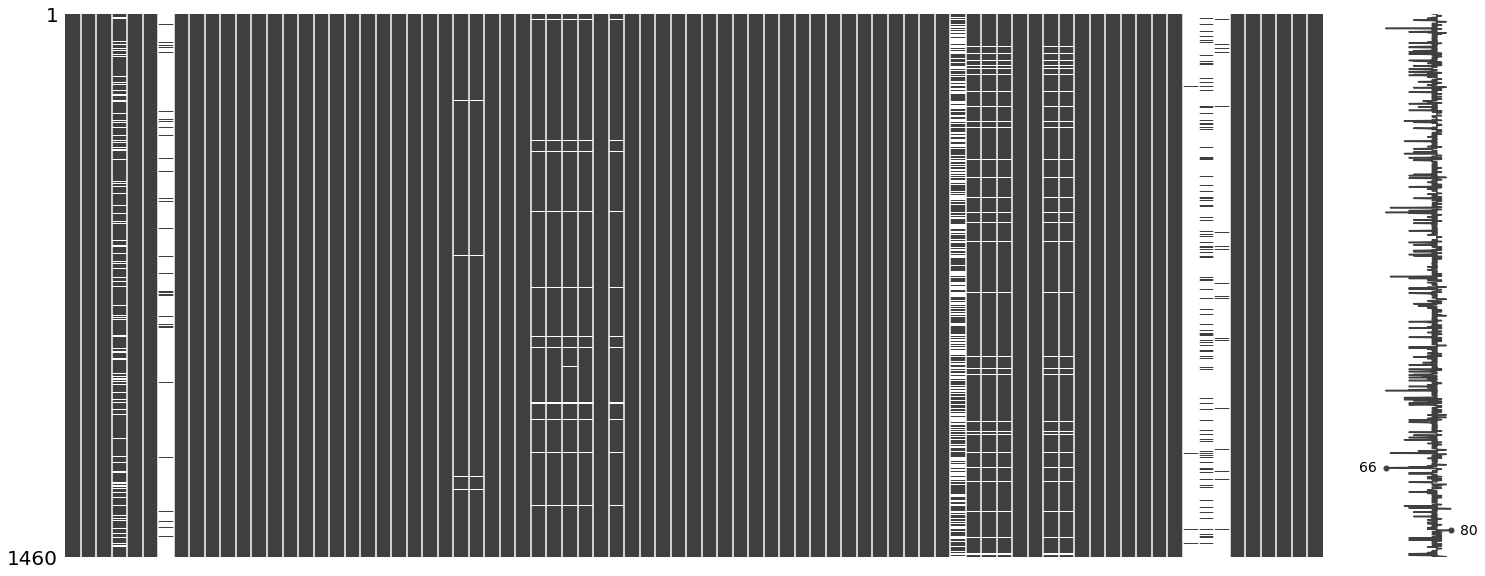

In [101]:
# 可视化缺失数据
msno.matrix(train)

In [102]:
# 显示训练集数据的信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [103]:
# 显示测试集数据的信息
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [104]:
# 训练集数据描述
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [105]:
# 测试集数据描述
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [106]:
# 统计训练集每一列NaN的数量
train.isnull().sum().sort_values(ascending=False)

 

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

<AxesSubplot:>

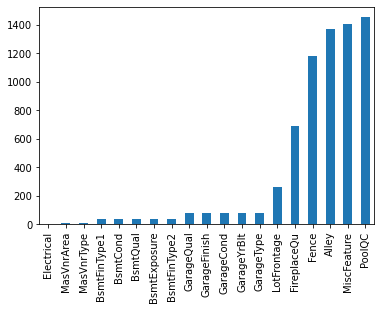

In [107]:
#缺失检查
#统计各变量缺失数据总和
missingTotal = train.isnull().sum().sort_values(ascending=False)

#仅选取有缺失的变量
missingExist = missingTotal[missingTotal > 0]
# 
# #将有缺失的变量按降序排列
missingExist.sort_values(inplace=True)
# 
# #将排好的数据以柱状图呈现
missingExist.plot.bar()

In [108]:
# 训练集每一列中，NaN所占比例
train.isnull().sum().sort_values(ascending=False) / train.shape[0]

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [109]:
# 测试集每一列中，NaN所占比例
test.isnull().sum().sort_values(ascending=False) / test.shape[0] 

PoolQC           0.997944
MiscFeature      0.965045
Alley            0.926662
Fence            0.801234
FireplaceQu      0.500343
                   ...   
Electrical       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
SaleCondition    0.000000
Length: 80, dtype: float64

In [110]:
# 删除训练集和测试集中NaN占比高的数据列
# 将训练集和测试集中 PoolQC，MiscFeature，Alley，Fence 列删除
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

test.drop(columns=['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [111]:
# 查看数据的行列情况
train.shape

(1460, 77)

In [112]:
# 查看数据的行列情况
test.shape

(1459, 76)

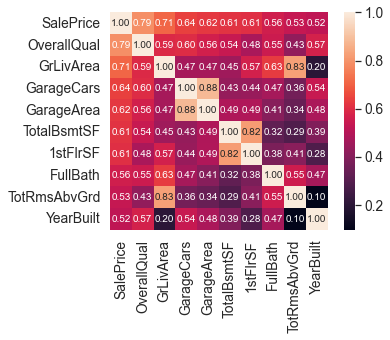

In [113]:
# 关系矩阵中将显示10个特征
#corrmat是相关性矩阵
corrmat = train.corr()
k  = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

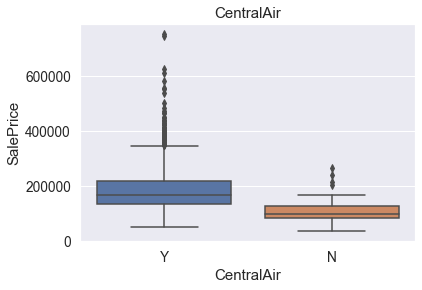

In [114]:
# CentralAir(中央空调)与销售价格的关系
data = pd.concat([train['SalePrice'], train['CentralAir']], axis=1)
fig = sns.boxplot(x='CentralAir', y="SalePrice", data=data)
plt.title('CentralAir')
plt.show()

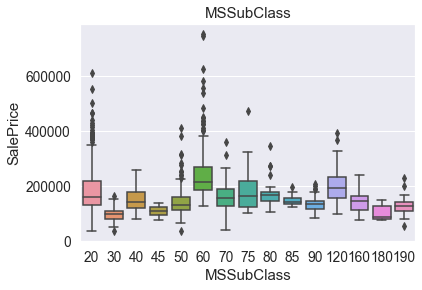

In [115]:
# MSSubClass(房屋类型)与销售价格的关系
data = pd.concat([train['SalePrice'], train['MSSubClass']], axis=1)
fig = sns.boxplot(x='MSSubClass', y="SalePrice", data=data)
plt.title('MSSubClass')
plt.show()

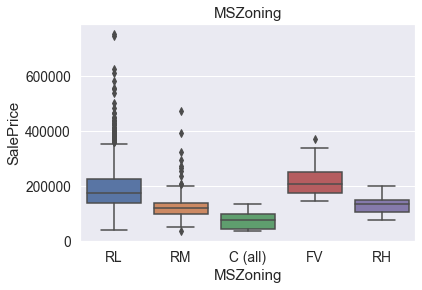

In [116]:
# MSZoning(房屋区域)与销售价格的关系
data = pd.concat([train['SalePrice'], train['MSZoning']], axis=1)
fig = sns.boxplot(x='MSZoning', y="SalePrice", data=data)
plt.title('MSZoning')
plt.show()

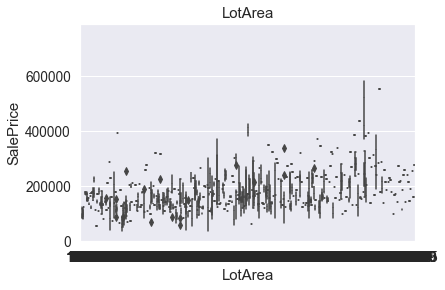

In [117]:
# LotArea(地块面积)与销售价格的关系
data = pd.concat([train['SalePrice'], train['LotArea']], axis=1)
fig = sns.boxplot(x='LotArea', y="SalePrice", data=data)
plt.title('LotArea')
plt.show()

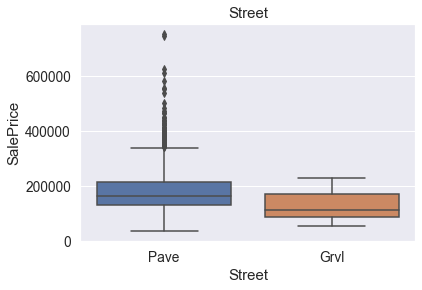

In [118]:
# Street(街道类型)与销售价格的关系
data = pd.concat([train['SalePrice'], train['Street']], axis=1)
fig = sns.boxplot(x='Street', y="SalePrice", data=data)
plt.title('Street')
plt.show()

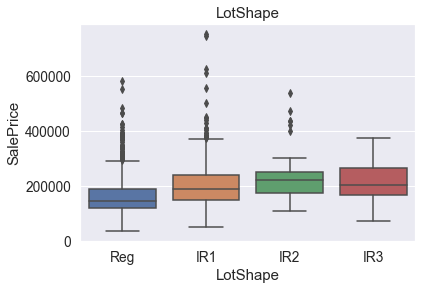

In [119]:
# LotShape(房屋形状)与销售价格的关系
data = pd.concat([train['SalePrice'], train['LotShape']], axis=1)
fig = sns.boxplot(x='LotShape', y="SalePrice", data=data)
plt.title('LotShape')
plt.show()

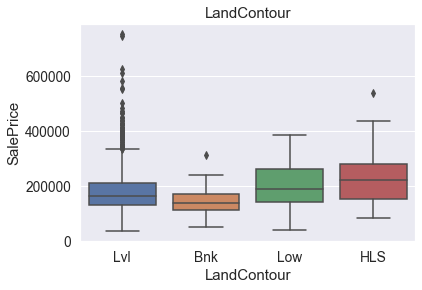

In [120]:
# LandContour(房屋所在地)与销售价格的关系
data = pd.concat([train['SalePrice'], train['LandContour']], axis=1)
fig = sns.boxplot(x='LandContour', y="SalePrice", data=data)
plt.title('LandContour')
plt.show()

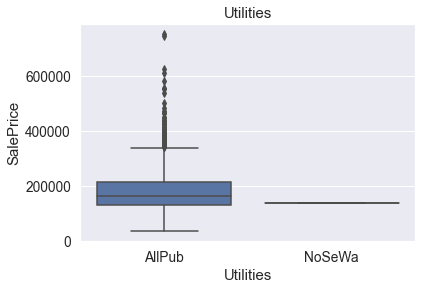

In [121]:
# Utilities(公共设施)与销售价格的关系
data = pd.concat([train['SalePrice'], train['Utilities']], axis=1)
fig = sns.boxplot(x='Utilities', y="SalePrice", data=data)
plt.title('Utilities')
plt.show()

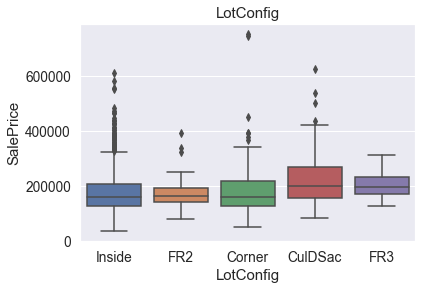

In [122]:
# LotConfig(房屋配置)与销售价格的关系
data = pd.concat([train['SalePrice'], train['LotConfig']], axis=1)
fig = sns.boxplot(x='LotConfig', y="SalePrice", data=data)
plt.title('LotConfig')
plt.show()

In [123]:
# 统计train,test所有列中的：数值类型的列和分类类型的列
number_columns = [ col for col in train.columns if train[col].dtype != 'object']

category_columns = [col for col in train.columns if train[col].dtype == 'object']

In [124]:
# 数值类型的列的数量
len(number_columns)

38

In [125]:
# 分类类型的列的数量
len(category_columns)

39

([<matplotlib.patches.Wedge at 0x180e54a5790>,
 [Text(-1.1997503136484646, 0.024478253622574744, ''),
  Text(1.0997711208444259, -0.022438399154026498, '')],
 [Text(-0.699854349628271, 0.014278981279835267, '49.4 %'),
  Text(0.5998751568242322, -0.01223912681128718, '50.6 %')])

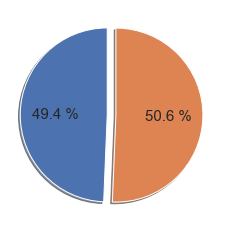

In [126]:
# 分类类型和数值类型的占比
fracs = [len(number_columns), len(category_columns)]
explode = [0.1, 0] 
plt.axes(aspect=1) 
plt.pie(x=fracs, explode=explode,autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)

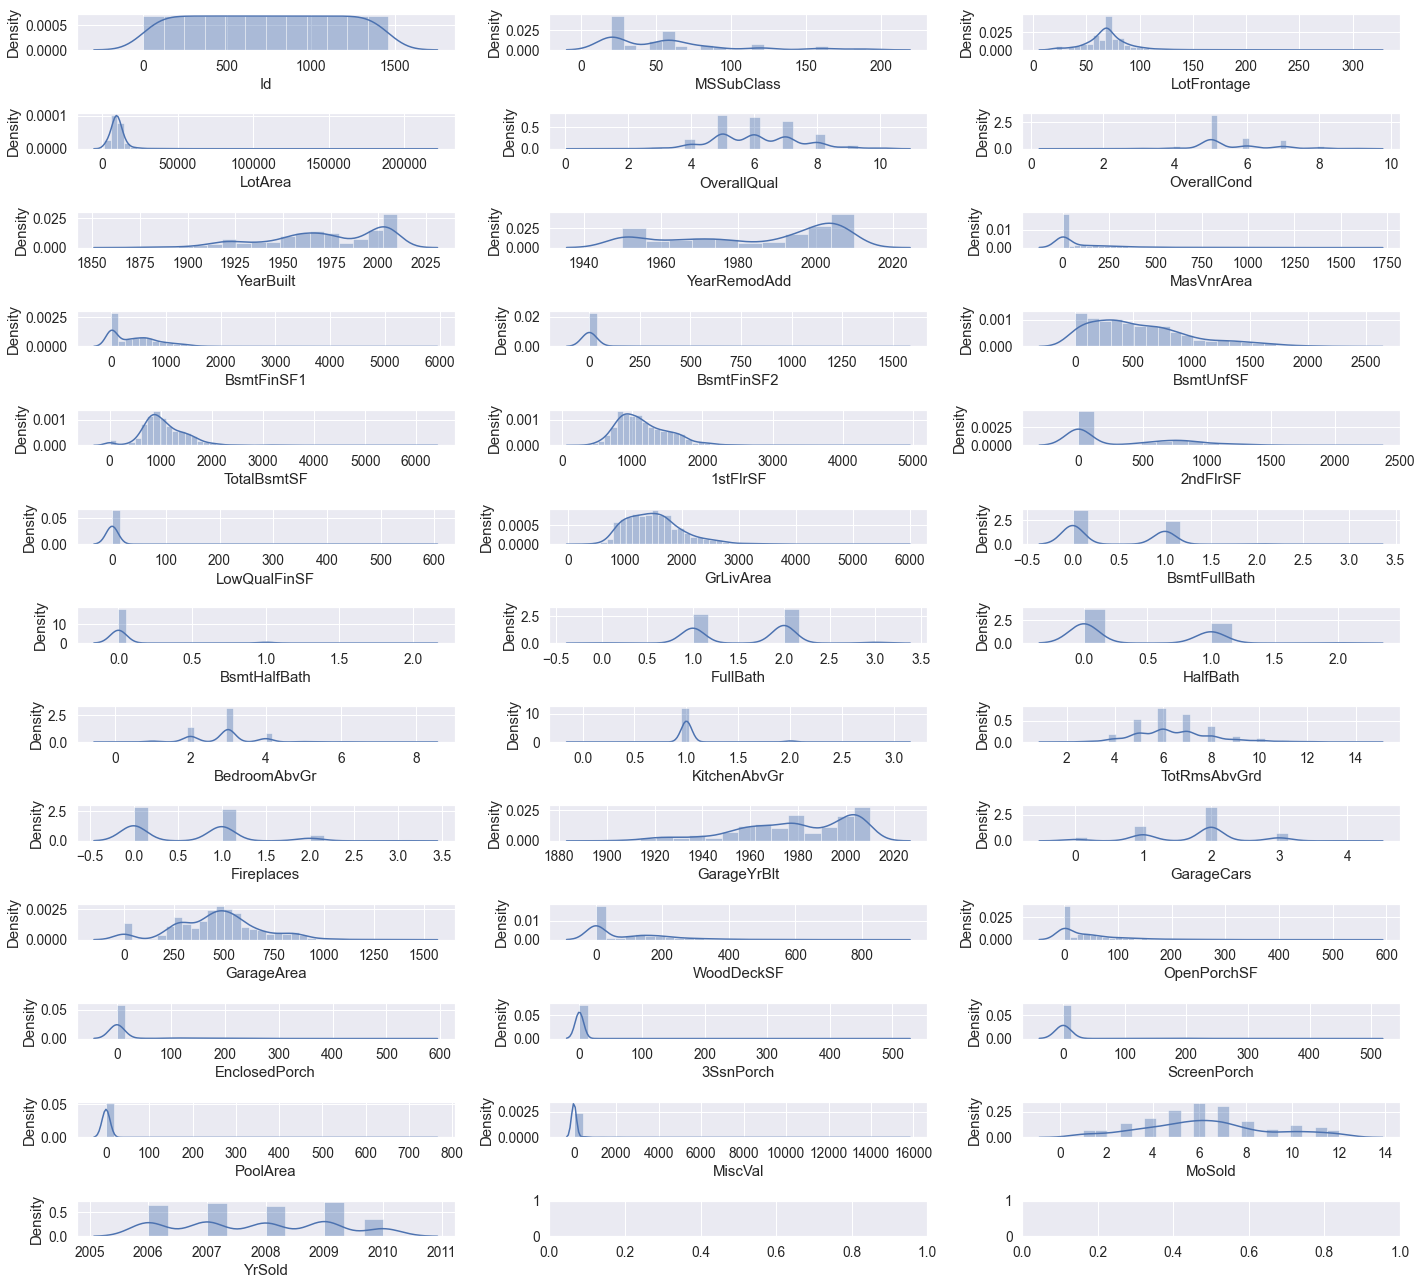

In [168]:
# 绘制显示数值类型列的数据分布
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(20, 18))
axes = axes.flatten()

for i, col in zip(range(len(number_columns)), number_columns):
    sns.distplot(train[col], ax=axes[i])
    plt.tight_layout()


In [128]:
# 找出平均mean，平均min，平均max较大的数标颜色
train[number_columns].describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['min'], cmap='Reds')\
                            .background_gradient(subset=['max'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


<AxesSubplot:>

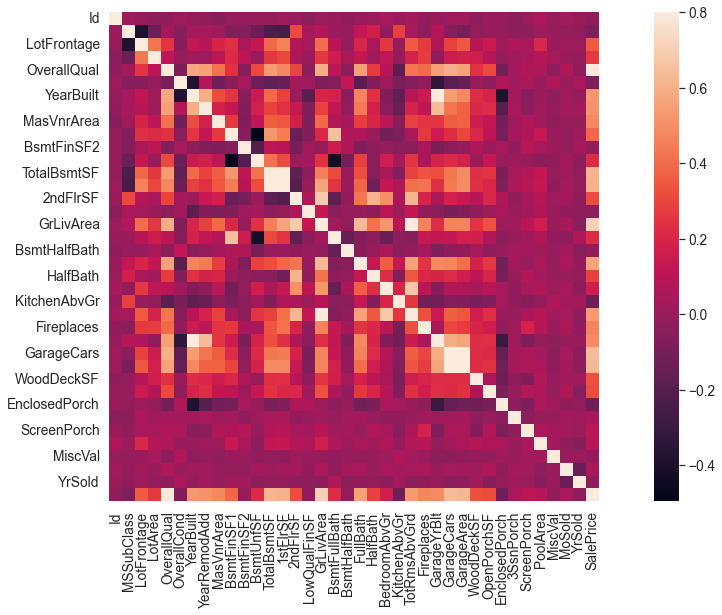

In [129]:
# 创建一个热点图，观察属性与SalePrice的相关性。
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

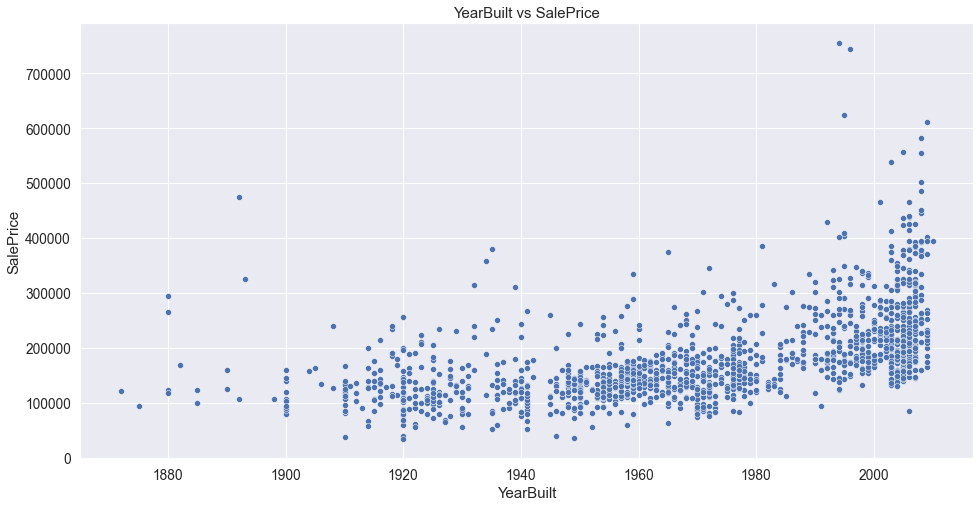

In [130]:
# 建造年份YearBuilt与售价SalePrice 的关系
plt.figure(figsize=(16, 8)) # 画布大小
plt.title("YearBuilt vs SalePrice")
sns.scatterplot(train.YearBuilt, train.SalePrice)
plt.show()

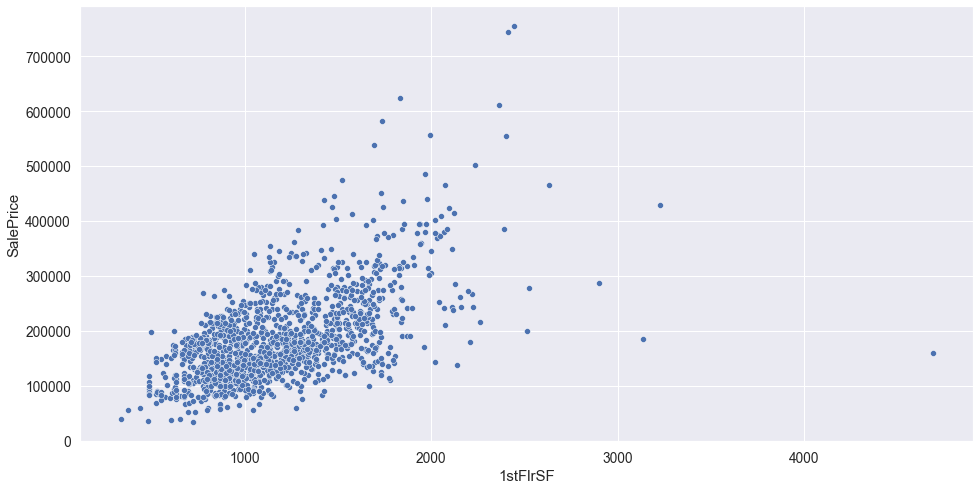

In [131]:
# 楼层面积1stFlrSF与售价SalePrice 的关系
plt.figure(figsize=(16, 8))
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=train)
plt.show()

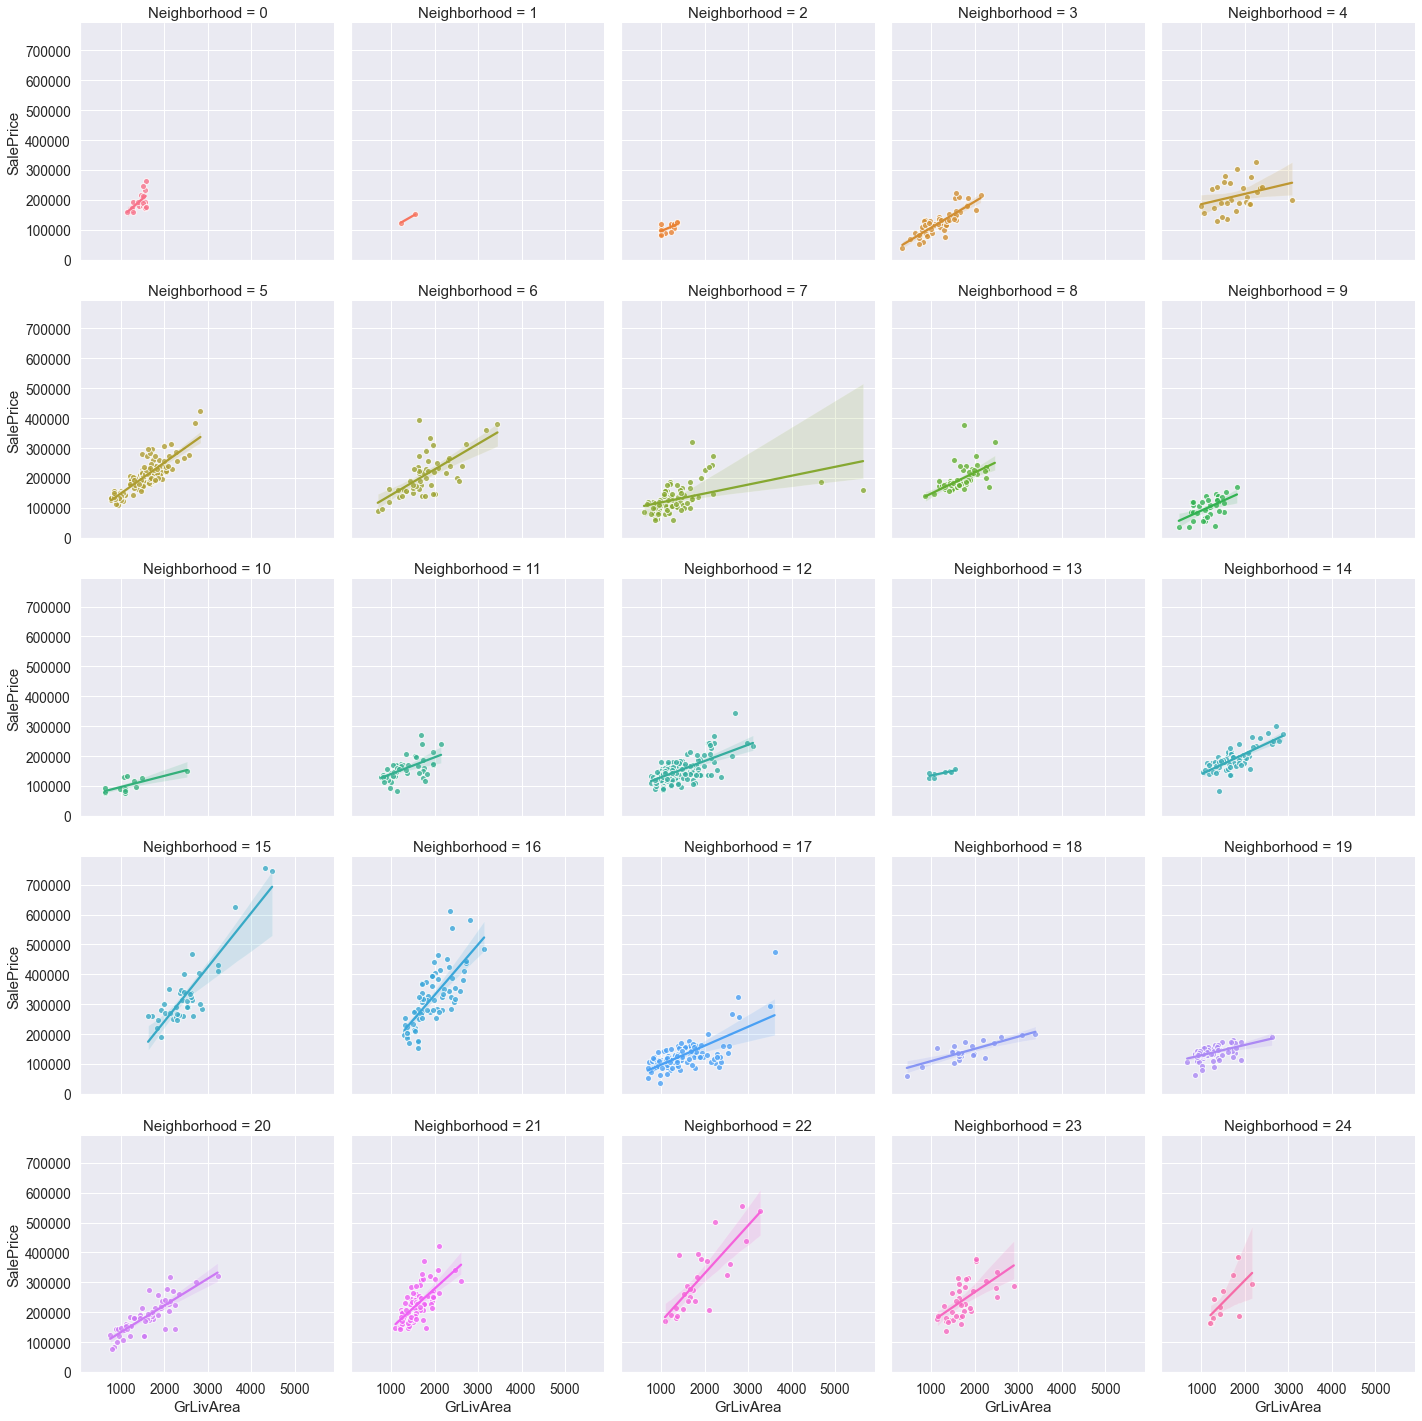

In [169]:
# 画出在Neighborhood的影响下GrLivArea与SalePrice的关系
sns.lmplot(
    x='GrLivArea', y="SalePrice", hue="Neighborhood", col="Neighborhood",
    data=train, scatter_kws={"edgecolor": 'w'}, col_wrap=5, height=4,
);

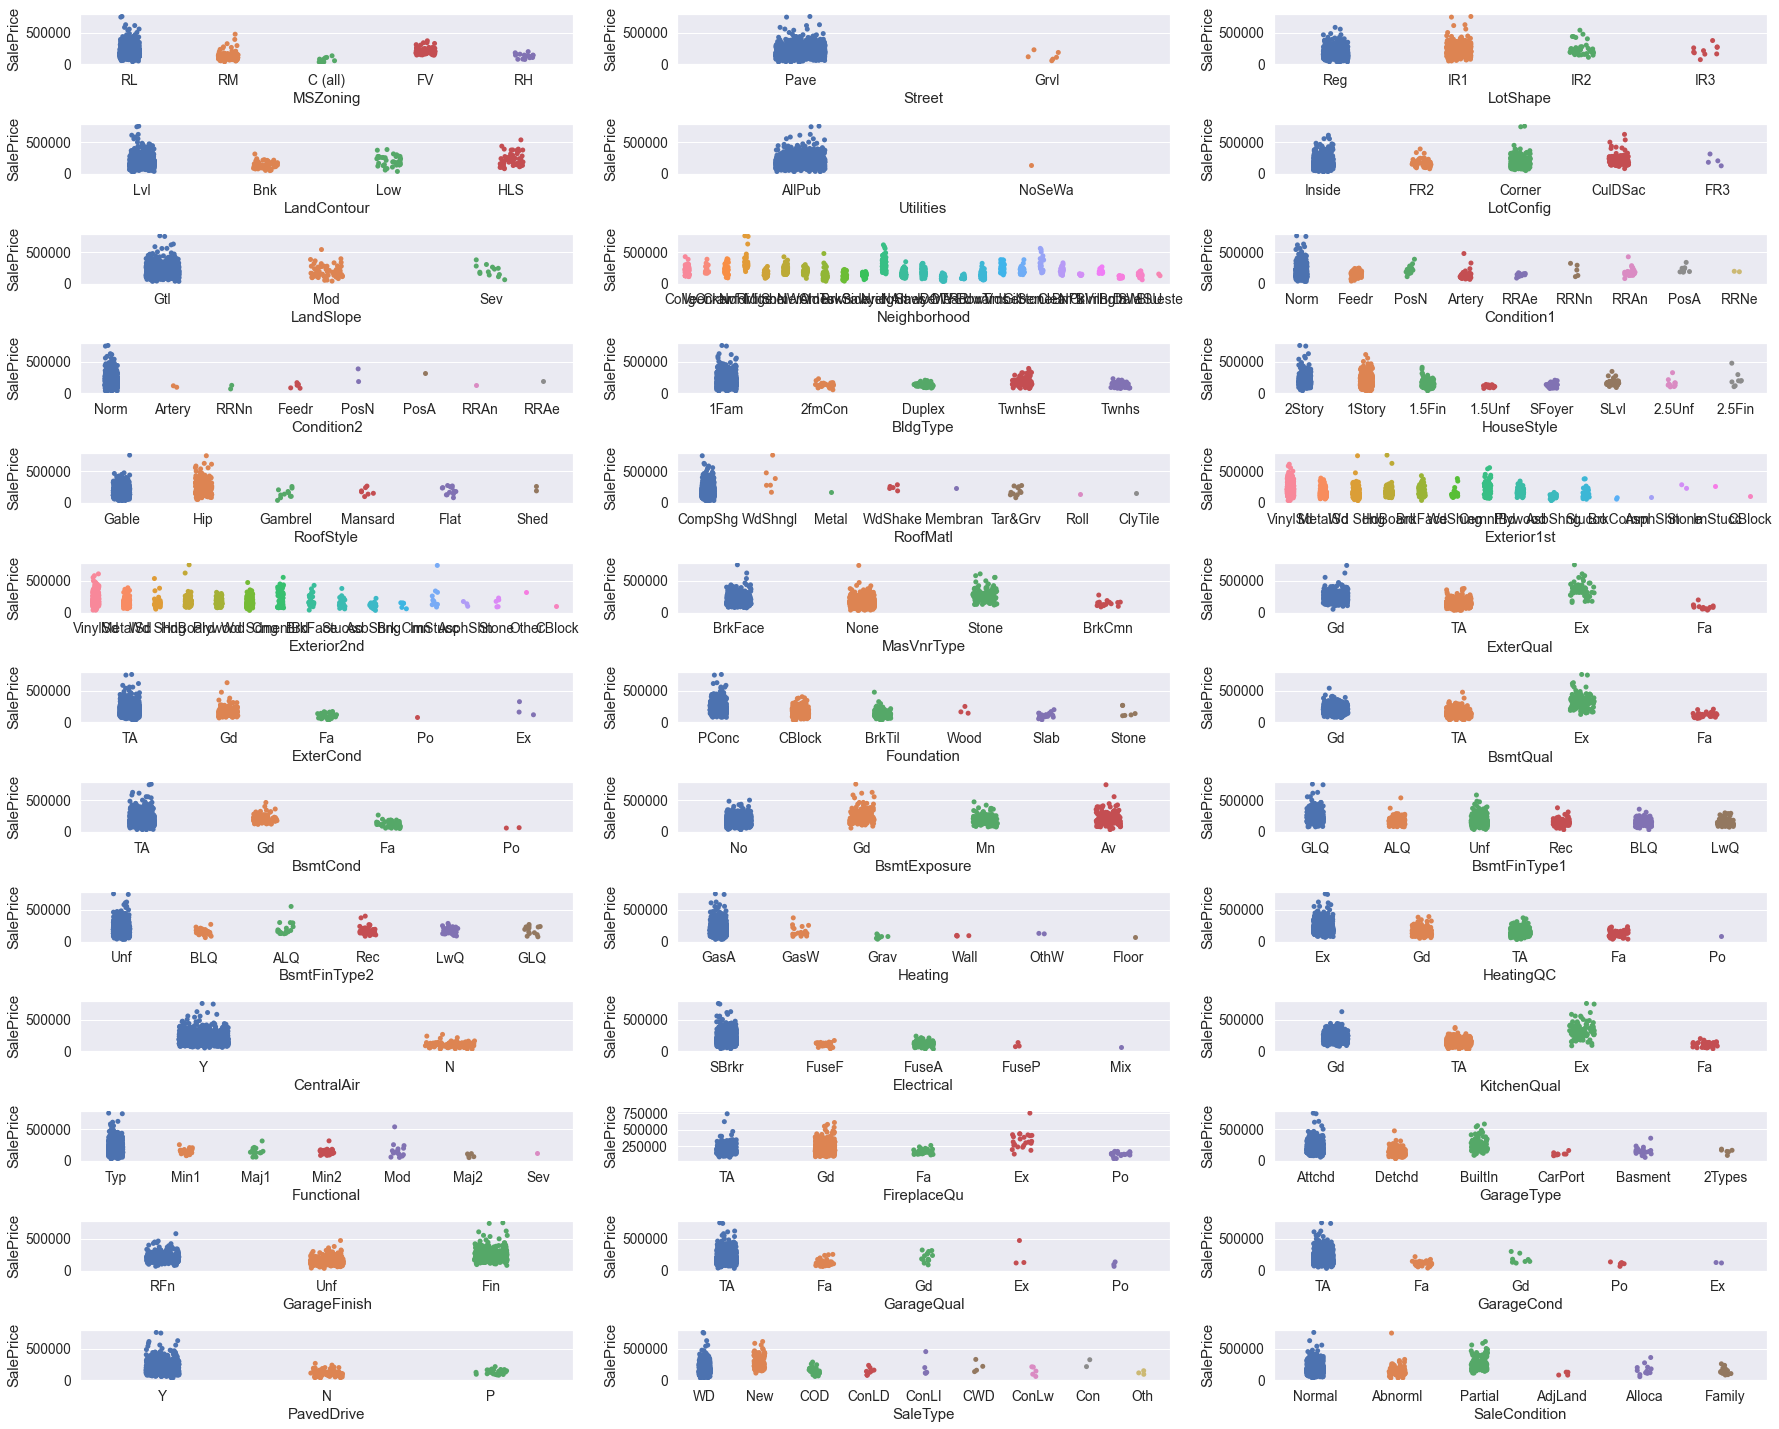

In [133]:
# 绘制显示分类类型列的数据分布
fig, axes = plt.subplots(13, 3, figsize=(25, 20))
axes = axes.flatten()
for i, col in enumerate(category_columns):
    sns.stripplot(x=col, y='SalePrice', data=train, ax=axes[i])
plt.tight_layout()
plt.show()

In [134]:
# 统计train中有哪些列包含NaN
train_nan_num = [] # train中数值类型包含NaN的列
train_nan_cat = [] # train中分类类型包含NaN的列

for col in number_columns:
    if train[col].isnull().sum() > 0:
        train_nan_num.append(col)

for col in category_columns:
    if train[col].isnull().sum() > 0:
        train_nan_cat.append(col)

In [135]:
# 训练集中数值类型包含NaN的列的数量
len(train_nan_num)

3

In [136]:
# 训练集中分类类型包含NaN的列的数量
len(train_nan_cat)

12

In [137]:
# 统计test中有哪些列包含NaN
test_nan_num = [] # test中数值类型的列
test_nan_cat = [] # test中分类类型的列

# 注意：需要将SalePrice清理，因为test中没有SalePrice
number_columns.remove('SalePrice')

for col in number_columns:
    if test[col].isnull().sum() > 0:
        test_nan_num.append(col)

for col in category_columns:
    if test[col].isnull().sum() > 0:
        test_nan_cat.append(col)

In [138]:
# 测试集中数值类型包含NaN的列的数量
len(test_nan_num)

11

In [139]:
# 测试集中分类类型包含NaN的列的数量
len(test_nan_cat)

18

## 针对 空缺值 的处理方式

### 1 简单粗暴：直接删除

In [140]:
# 只要该行中有空缺值就删除该行，发现留下的数据很少，该方法不可行
train_one = train.dropna(axis=0)
test_one = test.dropna(axis=0)
print(train_one.shape)
print(test_one.shape)

(583, 77)
(562, 76)


### 2 折中法：对于数值类型列，取中位数；对于分类类型列，取None；

In [141]:
# 训练集中数值类型空缺值用中位数替代，分类类型空缺值永None替代
for col in train_nan_num:
    train[col].fillna(train[col].median(), inplace=True) 
    
for col in train_nan_cat:
    train[col].fillna('None', inplace=True)

In [142]:
# 查看训练集中数据的行列情况
train.shape

(1460, 77)

In [143]:
# 测试集中数值类型空缺值用中位数替代，分类类型空缺值用None替代
for col in test_nan_num:
    test[col].fillna(test[col].median(), inplace=True) # 中位数

for col in test_nan_cat:
    test[col].fillna('None', inplace=True)

In [144]:
# 查看测试集中数据的行列情况
test.shape

(1459, 76)

## 1 算法建模、训练、验证

### 1 数据集分类

In [145]:
# 对分类类型列进行LabelEncoding
# 举例：A, B, C, D, E  --LabelEncoding--> 0, 1, 2, 3, 4
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in category_columns:
    train[col] = LE.fit_transform(train[col])
    test[col] = LE.fit_transform(test[col])

In [146]:
# 把训练集中的数据构建成训练集和验证集
X = train.drop(columns=['Id', 'SalePrice'], axis=1).values # 说明：Id不是特征，SalePrice是标签，需要屏蔽
y = train['SalePrice'].values # 标签 SalePrice

### 2 数据集分离

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True) # 验证集占比30%，打乱顺序

In [148]:
# 查看训练集中数据的行列情况
X_train.shape

(1022, 75)

In [149]:
# 查看验证集中数据的行列情况
X_test.shape

(438, 75)

## 2 创建回归模型

In [150]:
# 1 线性回归
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
'''
MSE: Mean Squared Error
均方误差是指参数估计值与参数真值之差平方的期望值;
MSE可以评价数据的变化程度，MSE的值越小，说明预测模型描述实验数据具有更好的精确度。
'''

LR = LinearRegression()
# 训练
LR.fit(X_train, y_train) 
# 预测
y_pred = LR.predict(X_test)

# 将预测的房屋价格值和真实的房屋价格值传入MSE评估指标方法中，得到MSE
print(f'Root Mean Squared Error : {np.sqrt(mean_absolute_error(np.log(y_test), np.log(y_pred)))}')

Root Mean Squared Error : 0.3571638320625985


In [151]:
# K折交叉验证
from sklearn.model_selection import KFold
# 10折
kf = KFold(n_splits=10)
# 用来保存10折运行的结果
rmse_scores = []

# 分割元数据，生成索引
for train_indices, test_indices in kf.split(X): 
    # 训练集和验证集
    X_train, X_test = X[train_indices], X[test_indices] 
    # 训练标签集和验证标签集
    y_train, y_test = y[train_indices], y[test_indices] 
    # 初始化线性回归模型对象
    LR = LinearRegression(normalize=True)
    # 训练
    LR.fit(X_train, y_train) 
    # 预测
    y_pred = LR.predict(X_test) 
    # 评估
    rmse = np.sqrt(mean_absolute_error(np.log(y_test), np.log(abs(y_pred)))) 
    # 累计每一轮的验证结果
    rmse_scores.append(rmse) 

# 得到10组均方根误差
print("rmse scores : ", rmse_scores)
# 得到均方根误差平均值
print(f'average rmse score : {np.mean(rmse_scores)}')

rmse scores :  [0.3471985035869259, 0.326055316214772, 0.3410903715062848, 0.3485567270532626, 0.33942521673311327, 0.3200947395038329, 0.5580473283171222, 0.3472292859008084, 0.3500045660875265, 0.32424801746990783]
average rmse score : 0.36019500723735565


In [152]:
# 2 随机森林（回归）
from sklearn.ensemble import RandomForestRegressor

# K折交叉验证
kf = KFold(n_splits=10)

# 用来保存10折运行的结果
rmse_scores = [] 

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    # 初始化模型
    RFR = RandomForestRegressor() # 基模型
    # 训练/fit拟合
    RFR.fit(X_train, y_train)
    # 预测
    y_pred = RFR.predict(X_test)
    # 评估
    rmse = mean_absolute_error(y_test, y_pred)
    # 累计结果
    rmse_scores.append(rmse)

# 得到10组均方根误差
print("rmse scores : ", rmse_scores)
# 得到均方根误差平均值
print(f'average rmse scores : {np.mean(rmse_scores)}')

rmse scores :  [16823.068356164385, 17541.601164383566, 15770.659246575342, 18715.298630136986, 19489.111164383557, 15086.268835616438, 16310.245342465749, 16187.284589041095, 20669.868972602737, 17208.501917808222]
average rmse scores : 17380.190821917808


In [153]:
# 3 lightGBM（回归）
import lightgbm as lgb

# K折交叉验证
kf = KFold(n_splits=10)

# 用来保存10折运行的结果
rmse_scores = [] 

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    # 初始化模型
    LGBR = lgb.LGBMRegressor() # 基模型
    # 训练/fit拟合
    LGBR.fit(X_train, y_train)
    # 预测
    y_pred = LGBR.predict(X_test)
    # 评估
    rmse = mean_absolute_error(y_test, y_pred)
    # 累计结果
    rmse_scores.append(rmse)
    
# 得到10组均方根误差
print("rmse scores : ", rmse_scores)
# 得到10组均方根误差平均值
print(f'average rmse scores : {np.mean(rmse_scores)}')

rmse scores :  [15359.402748938854, 15741.737528953727, 15969.526562520143, 18894.146656718858, 18024.993613003247, 13965.125436661849, 15143.365694484835, 15078.135246736836, 19796.617026917127, 15653.692389674065]
average rmse scores : 16362.674290460956


In [154]:
# xgboost
import xgboost as xgb

# K折交叉验证
kf = KFold(n_splits=10)

# 用来保存10折运行的结果
rmse_scores = [] 

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    # 初始化模型
    XGBR = xgb.XGBRegressor() # 基模型
    # 训练/fit拟合
    XGBR.fit(X_train, y_train)
    # 预测
    y_pred = XGBR.predict(X_test)
    # 评估
    rmse = mean_absolute_error(y_test, y_pred)
    # 累计结果
    rmse_scores.append(rmse)

# 得到10组均方根误差
print("rmse scores : ", rmse_scores)
# 得到10组均方根误差平均值
print(f'average rmse scores : {np.mean(rmse_scores)}')

rmse scores :  [16110.042059075342, 16075.209225171233, 15938.499250856165, 20021.78087542808, 18082.502969820205, 16993.78622645548, 15104.168530607876, 14330.887360873288, 22004.944402825342, 16733.29898865582]
average rmse scores : 17139.511988976883


## 模型预测

In [155]:
# 测试集的行列数
test.shape

(1459, 76)

In [156]:
# 显示测试集数据，没标明默认显示前5行数据
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,9,4
1,1462,20,4,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,9,4
2,1463,60,4,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,9,4
3,1464,60,4,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,9,4
4,1465,120,4,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,9,4


In [157]:
# 根据前面的预测结果，选取lightGBM算法
# 在整个数据集上训练
LGBR.fit(X, y) 

# 测试集中Id并不是特征，这里需要删除，然后开始训练
test_pred = LGBR.predict(test.drop('Id',axis=1).values)

In [158]:
# 创建一个只有一列为一列为SalePrice的DataFrame型数据result_df
result_df = pd.DataFrame(columns=['SalePrice'])

# 把刚刚训练得到的数据放到result_df中
result_df['SalePrice'] = test_pred

# 把数据导出到LGBR_base_model.csv中
result_df.to_csv('LGBR_base_model.csv', index=None, header=True)

In [159]:
# 显示result_df中的数据
result_df

,SalePrice
0,129796.526226
1,149352.852576
2,181589.899522
3,170741.853808
4,192893.792670
...,...
1454,82351.830843
1455,82605.857384
1456,156565.544353
1457,112220.993992


<AxesSubplot:>

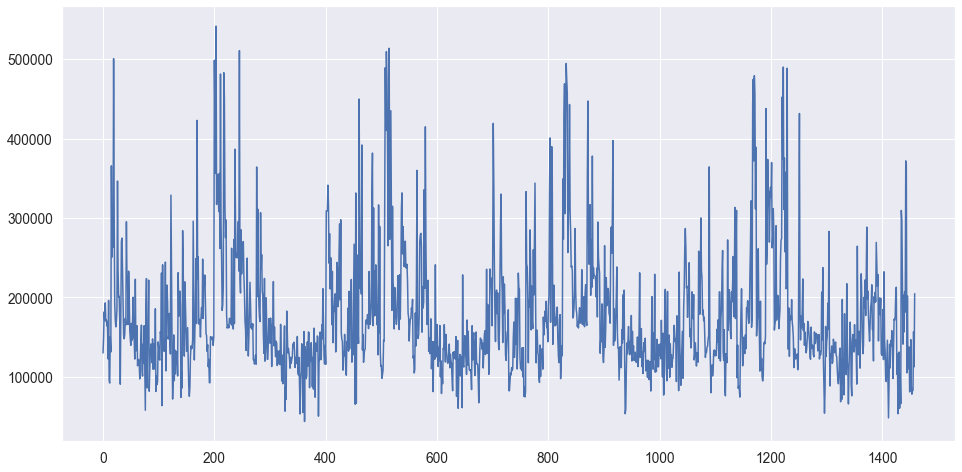

In [160]:
# 用图表示result_df中的数据
result_df['SalePrice'].plot(figsize=(16,8))

In [161]:
# 2 lightGBM算法调参
train_data = lgb.Dataset(X_train, label=y_train) # 训练集
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data) # 验证集

In [162]:
# 参数
params = {
    'objective':'regression', # 目标任务
    'metric':'rmse', # 评估指标
    'learning_rate':0.1, # 学习率
    'max_depth':15, # 树的深度
    'num_leaves':20, # 叶子数
}

# 创建模型对象
model = lgb.train(params=params,
                  train_set=train_data,
                  num_boost_round=300,
                  early_stopping_rounds=30,
                  valid_names=['test'],
                  valid_sets=[test_data])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3285
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 71
[LightGBM] [Info] Start training from score 181505.279300
[1]	test's rmse: 66924.6
Training until validation scores don't improve for 30 rounds
[2]	test's rmse: 61752.1
[3]	test's rmse: 57339.6
[4]	test's rmse: 52143
[5]	test's rmse: 48627.5
[6]	test's rmse: 45291.8
[7]	test's rmse: 42433.8
[8]	test's rmse: 40243.5
[9]	test's rmse: 38085.9
[10]	test's rmse: 36283.7
[11]	test's rmse: 34879.2
[12]	test's rmse: 33724.2
[13]	test's rmse: 32529.4
[14]	test's rmse: 31568.7
[15]	test's rmse: 30709.2
[16]	test's rmse: 29922.4
[17]	test's rmse: 29427.7
[18]	test's rmse: 28849.6
[19]	test's rmse: 28312.4
[20]	test's rmse: 27991.4
[21]	test's rmse: 27568.7
[22]	test's rmse: 27132.6
[23]	test's rmse: 26884.1
[24

In [163]:
# 最后一次为MES最小的值score
score = model.best_score['test']['rmse']

# 输出score
score

25323.26266593107

In [164]:
# 测试集中Id并不是特征，这里需要删除，然后开始训练
test_pred = model.predict(test.drop('Id',axis=1).values)

In [165]:
# 创建一个只有一列为一列为SalePrice的DataFrame型数据result_df2
result_df2 = pd.DataFrame(columns=['SalePrice'])

# 把刚刚训练得到的数据放到result_df2中
result_df2['SalePrice'] = test_pred

# 把数据导出到LGBR_model2.csv中
result_df2.to_csv('LGBR_model.csv', index=None, header=True, index_label="ID")

In [166]:
result_df2

,SalePrice
0,127742.749799
1,155906.590893
2,176449.339337
3,180284.875852
4,200875.619646
...,...
1454,85396.886800
1455,84526.250059
1456,173892.282094
1457,122012.442625


<AxesSubplot:>

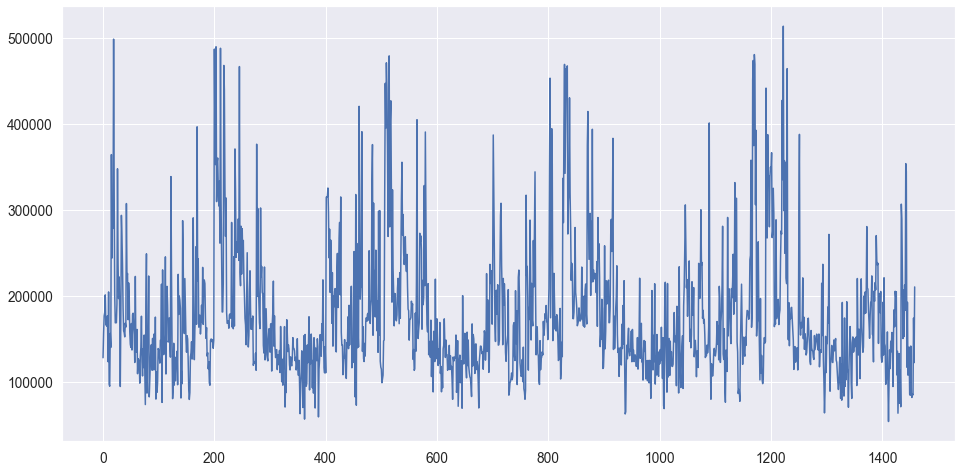

In [167]:
# 用图表示result_df2中的数据,
result_df2['SalePrice'].plot(figsize=(16,8))